In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("PWD ",os.getcwd())

# Read data

finish04normal = pd.read_csv("datalad-slurm-test-09_2025-03-29T174949+0100_with_4+0_out_args/timing_finish.txt", delimiter=" " )
finish04altdir = pd.read_csv("datalad-slurm-test-09_2025-03-29T174949+0100_with_4+0_out_args/timing_finish_alt.txt", delimiter=" " )

finish08normal = pd.read_csv("datalad-slurm-test-09_2025-03-23T141631+0100_with_4+4_out_args/timing_finish.txt", delimiter=" " )
finish08altdir = pd.read_csv("datalad-slurm-test-09_2025-03-23T141631+0100_with_4+4_out_args/timing_finish_alt.txt", delimiter=" " )

finish12normal = pd.read_csv("datalad-slurm-test-09_2025-03-28T090920+0100_with_4+8_out_args/timing_finish.txt", delimiter=" " )
finish12altdir = pd.read_csv("datalad-slurm-test-09_2025-03-28T090920+0100_with_4+8_out_args/timing_finish_alt.txt", delimiter=" " )


finish04normal= finish04normal[finish04normal['num_jobs']<=10000]
finish04altdir= finish04altdir[finish04altdir['num_jobs']<=10000]
finish08normal= finish08normal[finish08normal['num_jobs']<=10000]
finish08altdir= finish08altdir[finish08altdir['num_jobs']<=10000]
finish12normal= finish12normal[finish12normal['num_jobs']<=10000]
finish12altdir= finish12altdir[finish12altdir['num_jobs']<=10000]


dfs_datalad= [ 
    finish04normal, finish04altdir, 
    finish08normal, finish08altdir, 
    finish12normal, finish12altdir, ]
dfs_datalad_names= [
    "4 outputs", "4 outputs with --alt-dir", 
    "8 outputs", "8 outputs with --alt-dir",
    "12 outputs", "12 outputs with --alt-dir",]


PWD  /home/knue/prog/datalad-slurm.git/runtime-evaluation


In [2]:

win= 100

for df in [*dfs_datalad]:
#    df["rollingavg"]= df["time"].rolling(win,win_type ='triang').mean()
    df["rollingavg"]= df["time"].rolling(win).mean()
    df["rollingmin"]= df["time"].rolling(win).min()

    df.loc[0:win,"rollingavg"]= df.loc[0:win,"time"].mean()
    df.loc[0:win,"rollingmin"]= df.loc[0:win,"time"].min()

    # print("Sum over 'time' column: ", df["time"][win:].sum())
    # print("Sum over 'rollingavg' column: ", df["rollingavg"][win:].sum()) ## may differ slightly because the first 100 values are NaN
    # print("Sum over 'rollingmin' column: ", df["rollingmin"][win:].sum())
    print("Max in column: ", df["time"].max())


Max in column:  10.09
Max in column:  6.32
Max in column:  58.3
Max in column:  5.85
Max in column:  59.17
Max in column:  6.18


6


Text(0, 0.5, 'time [s]')

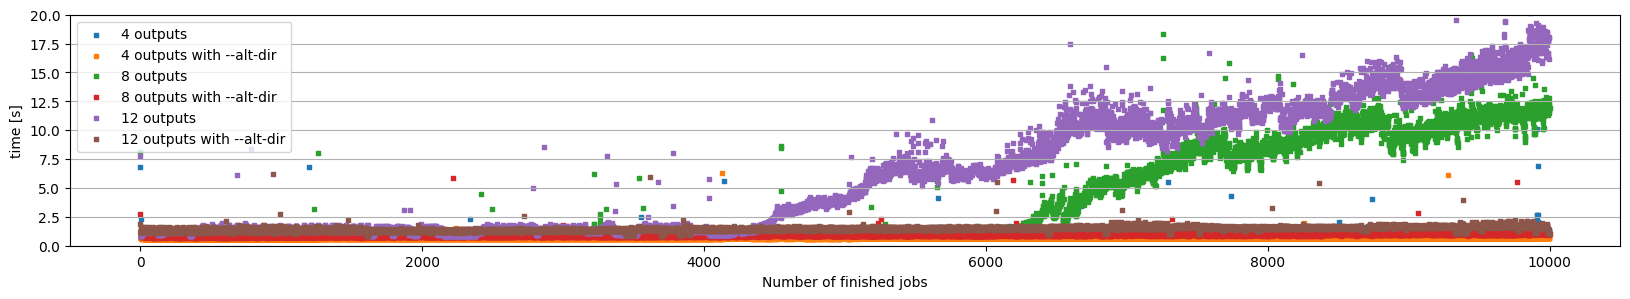

In [3]:
# Scatter plot for all timing values -- with outliers > 20

fig, ax = plt.subplots(figsize=(20, 3))

print(len(dfs_datalad))

for df in dfs_datalad:
    ax.scatter(x=df["num_jobs"],y=df["time"],marker=',',s=8)


#ax.set_xlim(0,11000)
ax.set_ylim(0,20.0)


#plt.legend(dfnames, loc='upper right')
plt.legend(dfs_datalad_names, loc='upper left')
plt.grid(axis = 'y')
#plt.title("Time for datalad finish commands")
plt.xlabel("Number of finished jobs")
plt.ylabel("time [s]")


6


Text(0, 0.5, 'time [s]')

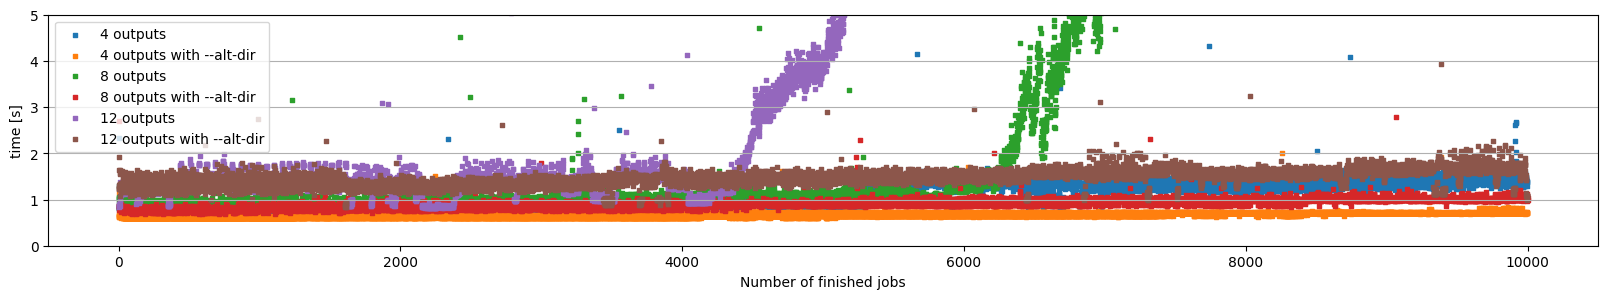

In [4]:
# Scatter plot for all timing values -- cut at y=3.0 -- use for the paper
 
fig, ax = plt.subplots(figsize=(20, 3))

print(len(dfs_datalad))

for df in dfs_datalad:
    ax.scatter(x=df["num_jobs"],y=df["time"],marker=',',s=8)

#ax.set_xlim(0,10000)
ax.set_ylim(0,5)


#plt.legend(dfnames, loc='upper right')
plt.legend(dfs_datalad_names)
plt.grid(axis = 'y')
#plt.title("Time for datalad finish commands")
plt.xlabel("Number of finished jobs")
plt.ylabel("time [s]")


Text(0, 0.5, 'time [s]')

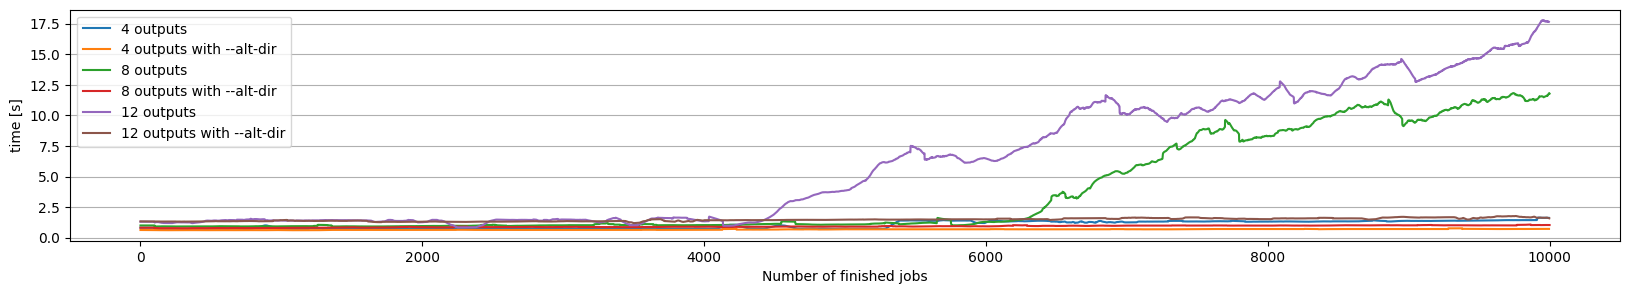

In [10]:
# Plots with rolling averages


cycle= plt.rcParams['axes.prop_cycle'].by_key()['color']


fig, ax = plt.subplots(figsize=(20, 3))

for df in dfs_datalad:
    ax.plot(df["rollingavg"])

# for i in range(len(dfs_datalad)):
#     ax.plot(dfs_datalad[i]["rollingmin"], color=cycle[i], linestyle='dotted' )


#ax.set_xlim(0,10000)
#ax.set_ylim(0,40.0)

plt.legend(dfs_datalad_names)
plt.grid(axis = 'y')
#plt.title("Rolling Avg")
#plt.title("Rolling average of time for datalad finish commands")
plt.xlabel("Number of finished jobs")
plt.ylabel("time [s]")


Text(0, 0.5, 'time [s]')

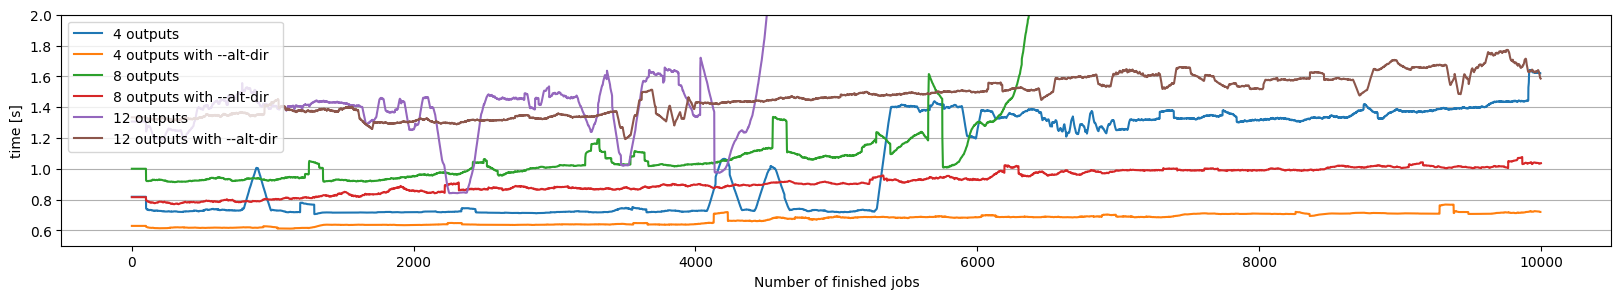

In [11]:
# Plots with rolling averages


cycle= plt.rcParams['axes.prop_cycle'].by_key()['color']


fig, ax = plt.subplots(figsize=(20, 3))

for df in dfs_datalad:
    ax.plot(df["rollingavg"])

#for i in range(len(dfs_datalad)):
#    ax.plot(dfs_datalad[i]["rollingmin"], color=cycle[i], linestyle='dotted' )


#ax.set_xlim(0,10000)
ax.set_ylim(0.5,2.0)

plt.legend(dfs_datalad_names, loc='upper left')
plt.grid(axis = 'y')
#plt.title("Rolling Avg")
#plt.title("Rolling average of time for datalad finish commands")
plt.xlabel("Number of finished jobs")
plt.ylabel("time [s]")


## Fit to rolling avg.

Text(0, 0.5, 'time [s]')

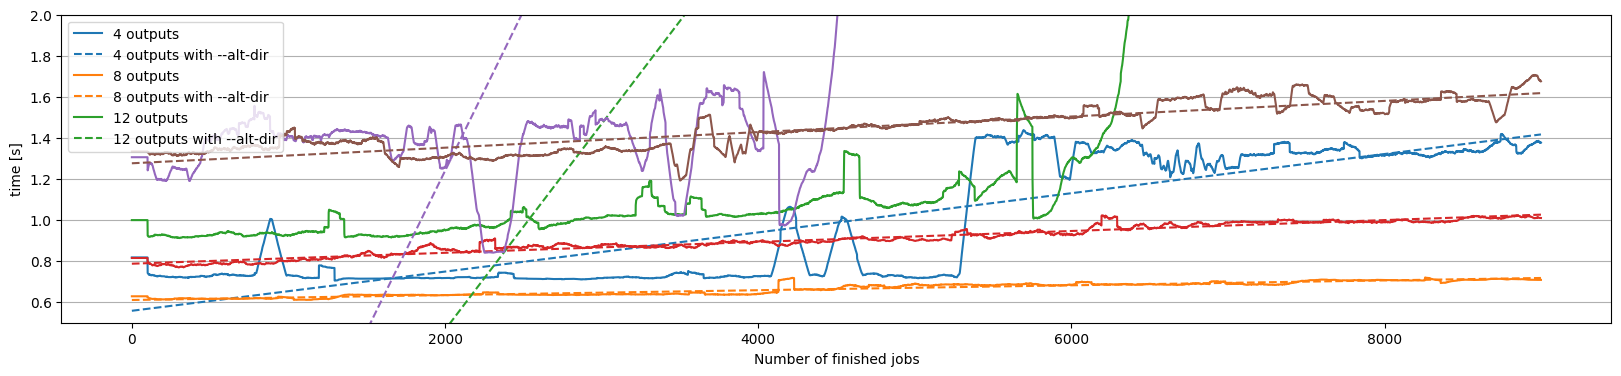

In [7]:
# Plots with rolling averages -- use for the paper

fig, ax = plt.subplots(figsize=(20, 4))

c=0.2 #levels 0f gray
for i in range(len(dfs_datalad)):

    df=dfs_datalad[i][0:9000]

    from sklearn.linear_model import LinearRegression
    Y = df["rollingavg"].to_numpy()  # -1 means that calculate the dimension of rows, but have 1 column
    YY = df["time"].to_numpy()
    length= len(Y)

    X = np.arange(length, dtype=float).reshape((length, 1))
    Y=Y.reshape((length, 1))

    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    Y_pred = linear_regressor.predict(X)  # make predictions

    ## plot


    ax.plot(df["rollingavg"], color=cycle[i] )

    ax.plot(Y_pred, color=cycle[i], linestyle='dashed' )


#ax.set_xlim(0,10000)
ax.set_ylim(0.5,2.0)

plt.legend(dfs_datalad_names)
plt.grid(axis = 'y')

plt.xlabel("Number of finished jobs")
plt.ylabel("time [s]")


## Histogram with lin x-axis

Text(0.5, 0, 'time [s]')

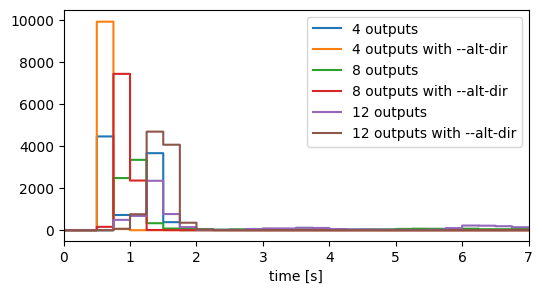

In [8]:
# histograms -- use for paper

w= 0.0
bins= [0]
while w < 132:
    bins.append(w)
    w += 0.25

#print("bins:", bins)


fig, ax = plt.subplots(figsize=(6, 3))
for i in range(len(dfs_datalad)):

    df=dfs_datalad[i]

    heights, bins = np.histogram(df['time'], bins= bins)
    ax.step(bins[:-1], heights,where='post')


#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(0.0,7.0)
ax.set_ylim(-500,10500)
plt.legend(dfs_datalad_names)

plt.xlabel("time [s]")
#plt.ylabel("histogram of time values [num]")




Text(0.5, 0, 'time [s]')

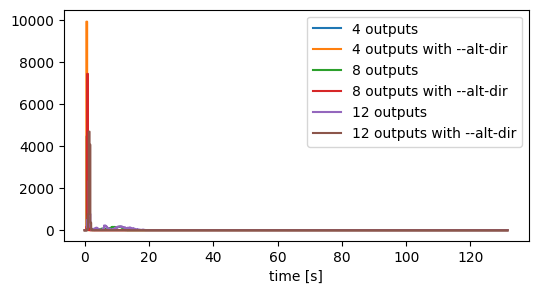

In [9]:
fig, ax = plt.subplots(figsize=(6, 3))
for i in range(len(dfs_datalad)):

    df=dfs_datalad[i]

    heights, bins = np.histogram(df['time'], bins= bins)
    ax.step(bins[:-1], heights,where='post')


#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim(0.0,20.0)
ax.set_ylim(-500,10500)
plt.legend(dfs_datalad_names)

plt.xlabel("time [s]")
#plt.ylabel("histogram [num]")


